In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-transactions/Products.csv
/kaggle/input/ecommerce-transactions/Customers.csv
/kaggle/input/ecommerce-transactions/Transactions.csv


## Files Description:

1. **Customers.csv**
   - **CustomerID**: Unique identifier for each customer.
   - **CustomerName**: Name of the customer.
   - **Region**: Continent where the customer resides.
   - **SignupDate**: Date when the customer signed up.

2. **Products.csv**
   - **ProductID**: Unique identifier for each product.
   - **ProductName**: Name of the product.
   - **Category**: Product category.
   - **Price**: Product price in USD.

3. **Transactions.csv**
   - **TransactionID**: Unique identifier for each transaction.
   - **CustomerID**: ID of the customer who made the transaction.
   - **ProductID**: ID of the product sold.
   - **TransactionDate**: Date of the transaction.
   - **Quantity**: Quantity of the product purchased.
   - **TotalValue**: Total value of the transaction.
   - **Price**: Price of the product sold.

In [3]:
# Reading the CSV files
products_df = pd.read_csv('/kaggle/input/ecommerce-transactions/Products.csv')
customers_df = pd.read_csv('/kaggle/input/ecommerce-transactions/Customers.csv')
transactions_df = pd.read_csv('/kaggle/input/ecommerce-transactions/Transactions.csv')

In [4]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [6]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [7]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [9]:
customers_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
transactions_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [13]:
# Converting data-type to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Customer Segmentation

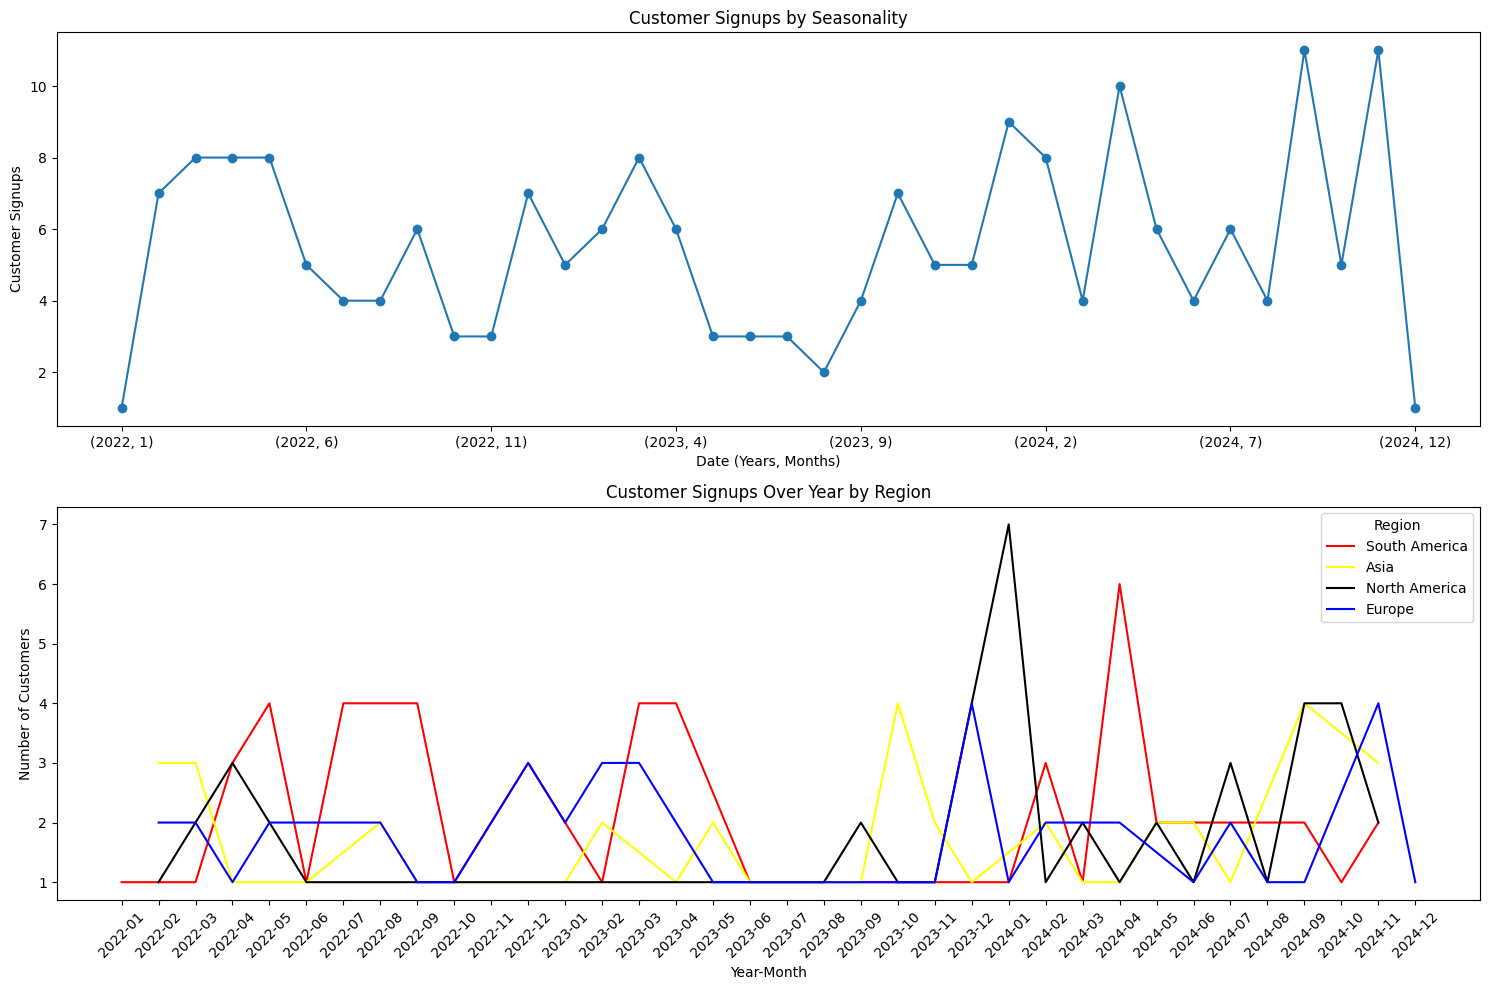

In [14]:
plt.figure(figsize=(15, 10))

                # Line chart of Customer Signups by Seasonality
plt.subplot(2, 1, 1)
signup_seasonl = customers_df.groupby([customers_df['SignupDate'].dt.year, customers_df['SignupDate'].dt.month]).size()

signup_seasonl.plot(kind='line', marker='o')
# title and labels
plt.title('Customer Signups by Seasonality')
plt.xlabel('Date (Years, Months)')
plt.ylabel('Customer Signups')

                # Line chart of Customer Signups by Region
plt.subplot(2, 1, 2)
customers_df['year'] = customers_df['SignupDate'].dt.year
customers_df['month'] = customers_df['SignupDate'].dt.month
signup_region = pd.DataFrame(customers_df.groupby(['Region', 'year', 'month'])['CustomerID'].count()).reset_index()
signup_region['Year-Month'] = signup_region['year'].astype(str) + '-' + signup_region['month'].astype(str).str.zfill(2)

sns.lineplot(data=signup_region.sort_values(by='Year-Month'), x='Year-Month', y='CustomerID', hue='Region', palette=['red', 'yellow', 'black', 'blue'])
# title and labels
plt.title('Customer Signups Over Year by Region')
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
df = pd.merge(customers_df, transactions_df, how='inner', on='CustomerID').sort_values(by='SignupDate',ascending=True)
df = df[['CustomerID', 'SignupDate', 'TransactionDate']].drop_duplicates(subset='CustomerID', keep='first')
df['first-order-after-singup'] = df['TransactionDate'] - df['SignupDate']
df.sort_values(by='CustomerID'), df['first-order-after-singup'].mean()

(    CustomerID SignupDate     TransactionDate first-order-after-singup
 0        C0001 2022-07-10 2024-01-19 03:12:55        558 days 03:12:55
 8        C0002 2022-02-13 2024-12-03 01:41:41       1024 days 01:41:41
 9        C0003 2024-03-07 2024-06-03 19:17:36         88 days 19:17:36
 13       C0004 2022-10-09 2024-07-19 10:56:13        649 days 10:56:13
 22       C0005 2022-08-15 2024-03-15 04:08:59        578 days 04:08:59
 ..         ...        ...                 ...                      ...
 985      C0196 2022-06-07 2024-12-15 03:43:35        922 days 03:43:35
 986      C0197 2023-03-21 2024-05-08 15:48:20        414 days 15:48:20
 989      C0198 2022-02-27 2024-10-04 18:31:12        950 days 18:31:12
 993      C0199 2022-12-03 2024-08-17 12:06:08        623 days 12:06:08
 998      C0200 2023-06-11 2024-09-10 09:50:48        457 days 09:50:48
 
 [199 rows x 4 columns],
 Timedelta('322 days 00:10:57.804020104'))

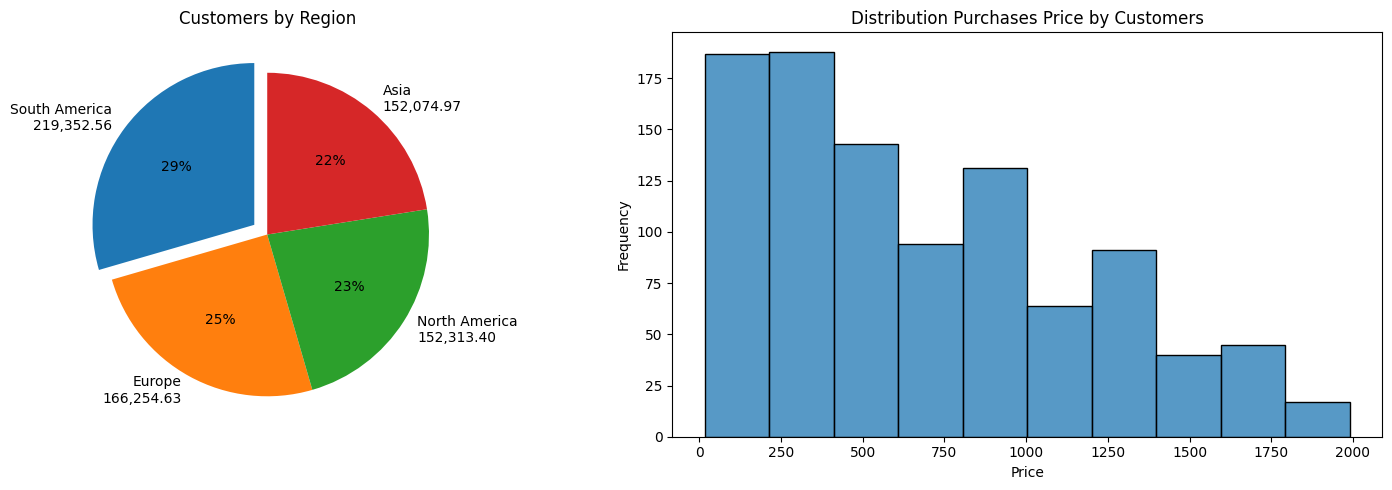

In [16]:
plt.figure(figsize=(15, 5))

                            # pieplot of Customers by Region
plt.subplot(1, 2, 1)

pr_region = pd.merge(transactions_df, customers_df, on='CustomerID')
region_total_value = pr_region.groupby('Region')['TotalValue'].sum()
region_counts = customers_df['Region'].value_counts()
region_rev_popul = pd.merge(region_counts, region_total_value, left_index=True, right_index=True)

labels = [f"{region}\n{revenue:,.2f}" for region, revenue in zip(region_rev_popul.index, region_rev_popul['TotalValue'])]
counts = region_counts.values
explode=[0.1,0,0,0]

plt.pie(x=counts, labels=labels, explode=explode, autopct='%.0f%%', startangle=90, counterclock=True) 
plt.title('Customers by Region')

                        # Purchases Price by Customers 
plt.subplot(1, 2, 2)
sns.histplot(transactions_df['TotalValue'], bins=10)
plt.title('Distribution Purchases Price by Customers')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

'Top and Bottom CustomerID contribution to revenue'

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0014      318.66
C0151      223.96
C0097      137.54
C0033      132.64
C0060       82.36
Name: TotalValue, Length: 199, dtype: float64

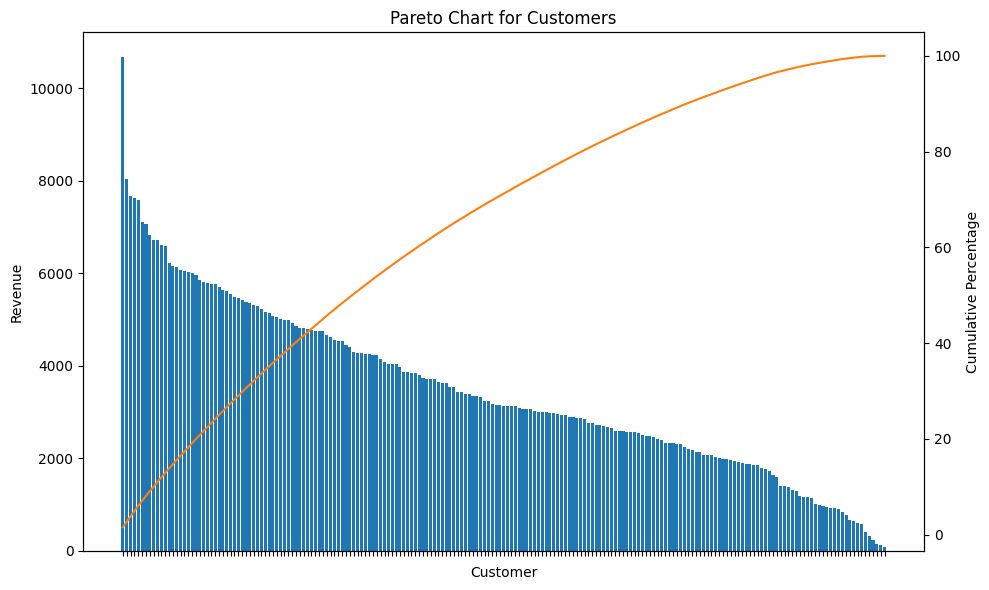

In [17]:
pareto_customer = transactions_df.groupby(['CustomerID'])['TotalValue'].sum().sort_values(ascending=False)
display('Top and Bottom CustomerID contribution to revenue',pareto_customer)
cumulative_percentage = pareto_customer.cumsum() / pareto_customer.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
# Bar plot for pareto_customer
ax.bar(pareto_customer.index, pareto_customer.values, color='C0')

# Line plot for cumulative percentage using multi axis
ax2 = ax.twinx()
ax2.plot(pareto_customer.index, cumulative_percentage, color='C1', linestyle='-')

# Titles and labels
ax.set_xticklabels([])
ax.set_title('Pareto Chart for Customers')
ax.set_xlabel('Customer')
ax.set_ylabel('Revenue')
ax2.set_ylabel('Cumulative Percentage')


plt.tight_layout()
plt.show()

In [18]:
total_pruc = pd.merge(customers_df, transactions_df, on='CustomerID', how='inner')
total_purchase = total_pruc.groupby('CustomerID')[['Quantity', 'TotalValue']].sum().sort_values(by='Quantity')
print('Top and Bottom Customer by Total Order')
total_purchase

Top and Bottom Customer by Total Order


,Quantity,TotalValue
CustomerID,,
C0097,1,137.54
C0058,1,396.34
C0150,2,580.34
C0033,2,132.64
C0130,2,601.36
...,...,...
C0065,27,7663.70
C0075,28,5848.97
C0156,28,7634.45


In [19]:
freq_cat = pd.merge(transactions_df, products_df, on='ProductID', how='inner')
freq_cat_pivot = pd.pivot_table(data=freq_cat, index=['Category'], values=['Price_x', 'CustomerID'], aggfunc={'Price_x':'sum', 'CustomerID':'count'}).sort_values(by='Price_x', ascending=False)
freq_cat_pivot

,CustomerID,Price_x
Category,,
Books,270,75742.08
Electronics,254,73335.39
Clothing,228,64547.77
Home Decor,248,58928.83


In [20]:
freq_cat_region = pd.merge(transactions_df, products_df, on='ProductID', how='inner')
freq_cat_region = pd.merge(freq_cat, customers_df, on='CustomerID', how='inner')
freq_cat_region_pivot = pd.pivot_table(data=freq_cat_region, 
                             index=['Category', 'Region'], 
                             values=['Price_x', 'CustomerID'], 
                             aggfunc={'Price_x': 'sum', 'CustomerID': 'count'})

freq_cat_region_pivot = freq_cat_region_pivot.sort_values(by='Price_x', ascending=False)
freq_cat_region_pivot

CustomerID   Price_x
Category    Region                             
Books       South America          90  25409.46
Electronics South America          79  23602.43
Books       Europe                 64  18557.69
Home Decor  South America          72  18267.18
Books       North America          65  18135.24
Electronics North America          60  17574.65
Clothing    Asia                   58  17200.90
            South America          63  16932.75
            North America          60  16276.36
Electronics Europe                 58  16090.71
            Asia                   57  16067.60
Home Decor  Europe                 65  15696.99
Clothing    Europe                 47  14137.76
Books       Asia                   51  13639.69
Home Decor  North America          59  12732.82
            Asia                   52  12231.84

### **Business Insights**

1. **Stable Customer Sign-ups with a Peak in 2024:**
   Customer sign-ups have remained relatively stable throughout the dataset, with no distinct seasonal trends. However, a significant increase in sign-ups was observed in 2024, reflecting heightened customer interest. Notably, November 2023 saw the highest number of new customers, with 7 sign-ups from North America alone. This indicates that North American customers exhibited notable interest towards the end of the year, which could be leveraged for future promotional campaigns. 

2. **South America's Dominance in Revenue Generation:**
   A regional analysis reveals that South America leads the customer base, contributing 29% of the total, generating a significant revenue of 219,352.56. In contrast, Asia and North America hold smaller shares of the customer base, accounting for 22% and 23%, respectively, with revenues of 152,074.97 and 152,313.40. This revenue distribution highlights the potential for growth in Asia, where the customer base is currently smaller but could benefit from targeted marketing efforts. Expanding the customer base in these underrepresented regions would help diversify revenue streams and reduce dependency on a single region.

3. **Price Range of Customer Purchases Reflects Economic Conditions:**
   The majority of customer purchases fall within the 50 to 1,000 price range, particularly in South America, where lower-income populations tend to make smaller transactions. This purchasing pattern aligns with the region's economic conditions, where affordable products are in greater demand. In Asia, however, there is considerable growth potential, driven by a large population and a rapidly expanding middle class. A tailored marketing strategy targeting this demographic, alongside efforts to improve internet penetration, could significantly increase growth in this region. By offering products at multiple price points and adapting product offerings to meet local demand, the company can strengthen its presence in these key markets.

4. **Pareto Principle Suggests Loyalty Programs:**
   A Pareto analysis indicates that 20% of the customer base generates the majority of the revenue. For example, customer C0141 contributed a revenue of 10,673.87, and customer C0109 purchased 32 items, generating 5,487.25 in revenue. This insight suggests that focusing on high-value customers through personalized engagement, and loyalty programs could further boost revenue. Offering exclusive benefits or targeted promotions to these top customers would enhance retention and lifetime value. Furthermore, analyzing the behaviours of these high-value customers could provide actionable insights for attracting similar clients, ultimately expanding the base of profitable customers and maximizing long-term revenue potential.

5. **Product Popularity by Region Shows Varied Preferences:**
   Books are the most purchased product overall, with 270 units sold across all regions except Asia, where clothing dominates as the top-selling category. In Asia, clothing sales contributed 75,742.08 in revenue, reflecting distinct regional preferences. This insight presents an opportunity for localized product marketing strategies. For example, increasing the promotion of clothing in Asia could further capitalize on this trend, while continuing to emphasize book sales in other regions. Understanding regional variations allows for more precise marketing campaigns and inventory management, improving overall sales efficiency and better meet the diverse demands of customers.